In [1]:
import pandas as pd
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)
dados.head(10)

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
5,1,33,173
6,1,64,1965
7,1,99,1993
8,1,45,278
9,0,96,12479


In [2]:
column_name = {'unfinished': 'Incompleto', 'expected_hours': 'Tempo_estimado', 'price': 'Preco'}
dados.rename(columns = column_name, inplace = True)
dados.head(10)

,Incompleto,Tempo_estimado,Preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
5,1,33,173
6,1,64,1965
7,1,99,1993
8,1,45,278
9,0,96,12479


In [3]:
# Invertendo valores usando list compreheension
dados['Finalizado'] = [0 if row == 1 else 1 for row in dados['Incompleto']]

In [4]:
# Invertendo valores usando função map
troca = {
    0:1,
    1:0
}
dados['Finalizado_Map'] = dados.Incompleto.map(troca)
dados.head(10)

,Incompleto,Tempo_estimado,Preco,Finalizado,Finalizado_Map
0,1,26,192,0,0
1,1,88,9015,0,0
2,1,89,2577,0,0
3,1,42,275,0,0
4,1,39,170,0,0
5,1,33,173,0,0
6,1,64,1965,0,0
7,1,99,1993,0,0
8,1,45,278,0,0
9,0,96,12479,1,1


In [5]:
dados2 = dados[['Tempo_estimado', 'Preco', 'Finalizado']]
dados2.head(10)

,Tempo_estimado,Preco,Finalizado
0,26,192,0
1,88,9015,0
2,89,2577,0
3,42,275,0
4,39,170,0
5,33,173,0
6,64,1965,0
7,99,1993,0
8,45,278,0
9,96,12479,1


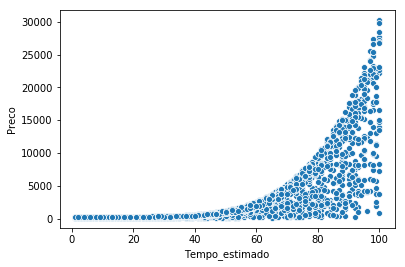

In [6]:
sns.scatterplot(x = 'Tempo_estimado', y = 'Preco', data = dados2)

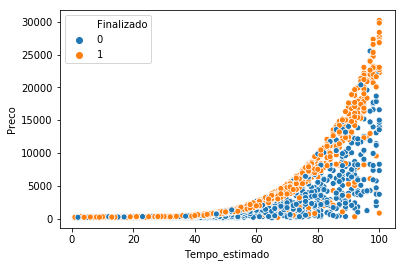

In [7]:
sns.scatterplot(x = 'Tempo_estimado', y = 'Preco', data = dados2, hue = 'Finalizado')

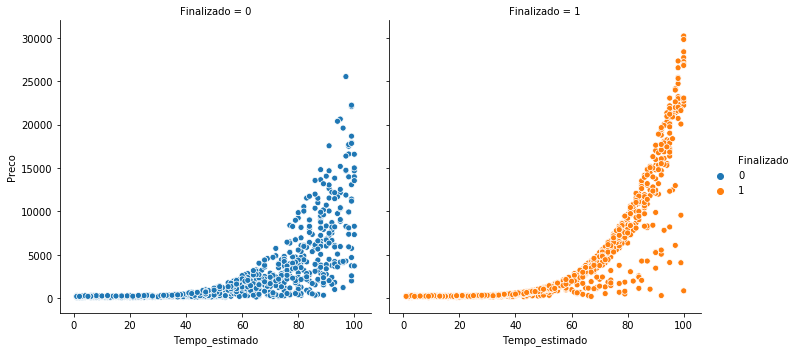

In [8]:
sns.relplot(x = 'Tempo_estimado', y = 'Preco', data = dados2, col = 'Finalizado', hue = 'Finalizado')

In [9]:
x = dados2[['Tempo_estimado', 'Preco']]
y = dados2['Finalizado']
SEED = 5
# Usar o random do numpy faz com que não seja necessário usar o random_state
np.random.seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)
model = LinearSVC()
model.fit(X_train, y_train)
previsoes = model.predict(X_test)
taxa_de_acerto = accuracy_score(y_test, previsoes)
print(f'A taxa de acerto foi de: {(taxa_de_acerto * 100).round(2)}')

A taxa de acerto foi de: 56.48


C:\Users\roger\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


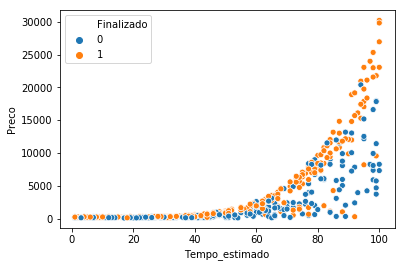

In [10]:
sns.scatterplot(x = 'Tempo_estimado', y = 'Preco', data = X_test, hue = y_test)

In [11]:
X_min = X_test.Tempo_estimado.min()
X_max = X_test.Tempo_estimado.max()
y_min = X_test.Preco.min()
y_max = X_test.Preco.max()
print(X_min, X_max, y_min, y_max)

1 100 100 30223


In [12]:
pixels = 100
eixo_x = np.arange(X_min, X_max, (X_max - X_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

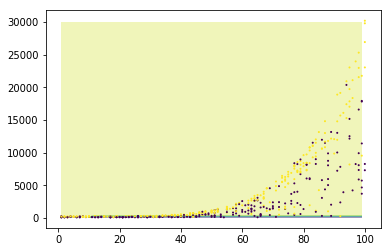

In [13]:
plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(X_test.Tempo_estimado, X_test.Preco, c = y_test, s = 1)

In [14]:
SEED = 5
# Usar o random do numpy faz com que não seja necessário usar o random_state
np.random.seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)
model = SVC()
model.fit(X_train, y_train)
previsoes = model.predict(X_test)
taxa_de_acerto = accuracy_score(y_test, previsoes)
print(f'A taxa de acerto foi de: {(taxa_de_acerto * 100).round(2)}')

C:\Users\roger\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


A taxa de acerto foi de: 59.07


In [15]:
# Recurso para tratar a escala das features
from sklearn.preprocessing import StandardScaler

In [16]:
SEED = 5
# Usar o random do numpy faz com que não seja necessário usar o random_state
np.random.seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)
# Criar e treinar o Scaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC()
model.fit(X_train, y_train)
previsoes = model.predict(X_test)
taxa_de_acerto = accuracy_score(y_test, previsoes)
print(f'A taxa de acerto foi de: {(taxa_de_acerto * 100).round(2)}')

A taxa de acerto foi de: 66.85


C:\Users\roger\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\roger\Anaconda\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\roger\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


-1.7348767953644189 1.7418048354450535 -0.5962799114048444 5.406738368968601


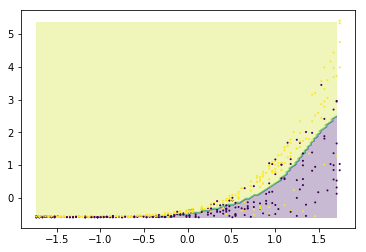

In [18]:
data_x = X_test[:,0]
data_y = X_test[:,1]

X_min = data_x.min()
X_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(X_min, X_max, (X_max - X_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

print(X_min, X_max, y_min, y_max)
plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(data_x, data_y, c = y_test, s = 1)